In [1]:
from gensim.models import Word2Vec

In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

### Dane:

In [3]:
sentences = []

for i in range(100000):
    start = np.random.randint(0, 20)
    finish = start + np.random.randint(1, 10)
    sentence = [str(x) for x in range(start, finish)]
    
    sentences.append(sentence)

In [4]:
sentences

[['19', '20', '21', '22', '23', '24', '25', '26'],
 ['13', '14', '15', '16', '17'],
 ['8', '9', '10', '11'],
 ['6', '7', '8', '9'],
 ['17', '18', '19', '20'],
 ['1', '2', '3', '4'],
 ['15', '16', '17', '18'],
 ['3', '4', '5', '6', '7', '8'],
 ['1', '2'],
 ['10', '11', '12', '13', '14', '15', '16', '17'],
 ['7'],
 ['6'],
 ['3', '4'],
 ['0'],
 ['5', '6', '7'],
 ['5', '6', '7', '8', '9', '10', '11', '12', '13'],
 ['14', '15', '16', '17'],
 ['19', '20', '21', '22', '23', '24', '25', '26', '27'],
 ['1', '2'],
 ['5', '6', '7', '8', '9', '10'],
 ['14', '15', '16', '17', '18', '19', '20', '21', '22'],
 ['8', '9', '10', '11'],
 ['13', '14', '15'],
 ['1', '2', '3', '4', '5', '6'],
 ['15', '16', '17', '18', '19', '20', '21'],
 ['19', '20', '21'],
 ['4', '5', '6', '7', '8', '9', '10', '11', '12'],
 ['10', '11', '12', '13'],
 ['19', '20', '21', '22', '23', '24', '25', '26'],
 ['16', '17'],
 ['12', '13', '14', '15'],
 ['19', '20', '21', '22', '23', '24'],
 ['0', '1', '2', '3', '4'],
 ['8', '9', '10'

### Model Word2Vec:

#### window - kontekst (probuje odnalezc wyraz na podstawie slow przed i po); min_count

In [5]:
model = Word2Vec(sentences, size=10, window=4, min_count=1)

In [6]:
model.wv['1']

array([-0.2991867 , -1.5685314 , -2.1847765 , -0.72482365, -0.25713068,
        2.6389167 , -1.047179  ,  1.483951  , -1.2092453 ,  3.7785451 ],
      dtype=float32)

In [7]:
def plot_heatmap(model):
    plt.figure(figsize=(15, 8))
    sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5);

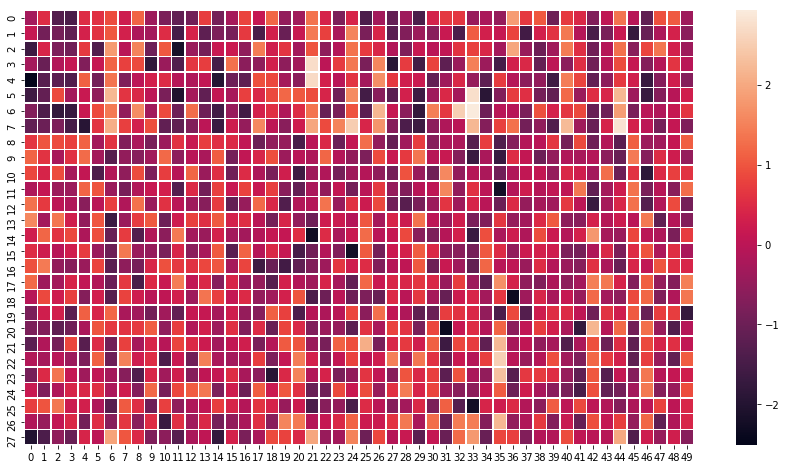

In [8]:
plot_heatmap(Word2Vec(sentences, size=50, window=10))

### Model PCA - zmienia ilość wymiarów

In [9]:
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)

    plt.figure(figsize=(8, 5))
    plt.scatter(result[:,0], result[:,1]);

    words = list(model.wv.vocab)

    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

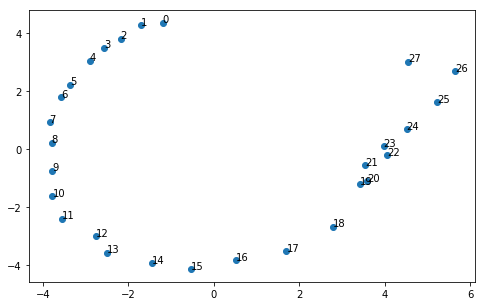

In [10]:
plot_pca(Word2Vec(sentences, size=50, window=10))

### Podobne słowa:

In [11]:
model = Word2Vec(sentences, size=300, window=5)

In [12]:
model.wv.most_similar('10', topn=3)

[('12', 0.38890737295150757),
 ('8', 0.3471485674381256),
 ('7', 0.30383366346359253)]

In [13]:
model.wv.most_similar(positive=['10', '8'], negative=['6'], topn=3)

[('12', 0.35738667845726013),
 ('11', 0.3250880539417267),
 ('13', 0.3056688904762268)]